---
## Objective : Detection of Indian food items pictures using tranfer learning with a pre-trained Model

---

### Approach to solving the problem: 
 
* Import images, do eda on the dataset
* Import a pre-trained Densenet model trained on imagenet to build a new ML model to detect food items.
* Add a custom layer for model training.
* Optimizer used : adam
* Loss function : kullback_leibler_divergence
* We are creating a new custom model using tranfer learning to detect images.

### Model summary


In [42]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________


### Results


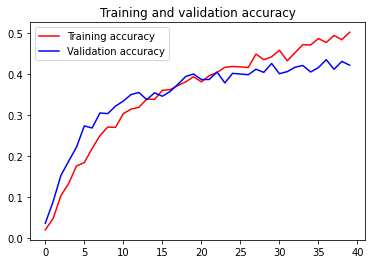

<Figure size 432x288 with 0 Axes>

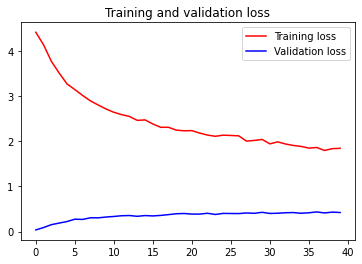

<Figure size 432x288 with 0 Axes>

In [46]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()


plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [44]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                   validation_data=(x_val, y_val),
                   epochs=40)

Epoch 1/40
88/88 [==============================] - 35s 292ms/step - loss: 4.4199 - accuracy: 0.0204 - val_loss: 4.2535 - val_accuracy: 0.0367
Epoch 2/40
88/88 [==============================] - 19s 221ms/step - loss: 4.1393 - accuracy: 0.0482 - val_loss: 3.8067 - val_accuracy: 0.0892
Epoch 3/40
88/88 [==============================] - 19s 219ms/step - loss: 3.7730 - accuracy: 0.1039 - val_loss: 3.4127 - val_accuracy: 0.1533
Epoch 4/40
88/88 [==============================] - 20s 227ms/step - loss: 3.5140 - accuracy: 0.1339 - val_loss: 3.1247 - val_accuracy: 0.1883
Epoch 5/40
88/88 [==============================] - 19s 221ms/step - loss: 3.2744 - accuracy: 0.1764 - val_loss: 3.0327 - val_accuracy: 0.2225
Epoch 6/40
88/88 [==============================] - 23s 261ms/step - loss: 3.1489 - accuracy: 0.1846 - val_loss: 2.8604 - val_accuracy: 0.2742
Epoch 7/40
88/88 [==============================] - 20s 227ms/step - loss: 3.0186 - accuracy: 0.2193 - val_loss: 2.7880 - val_accuracy: 0.2692


### Inference


In [47]:
image=load_img("../input/indian-food-images-dataset/Indian Food Images/Indian Food Images/aloo_matar/9dcac3cc68.jpg",target_size=(150,150))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [50]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is bhindi_masala.



### References : https://www.kaggle.com/datasets/iamsouravbanerjee/indian-food-images-dataset


### EDA and modelling

In [26]:
import os
import re
import cv2
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
df = pd.read_csv('../input/indian-food-images-dataset/List of Indian Foods.txt')
df.head()

,adhirasam
0,aloo_gobi
1,aloo_matar
2,aloo_methi
3,aloo_shimla_mirch
4,aloo_tikki


In [28]:
df.shape

(79, 1)

In [29]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['food_id'] = label_encoder.fit_transform(df['adhirasam'])
df.head()

,adhirasam,food_id
0,aloo_gobi,0
1,aloo_matar,1
2,aloo_methi,2
3,aloo_shimla_mirch,3
4,aloo_tikki,4


In [30]:
unique_labels_df = df['adhirasam'].unique()

In [31]:
print('Total Unique Label: ', len(unique_labels_df))

Total Unique Label:  79


In [32]:
food_unique = df['food_id'].unique()
len(food_unique)

79

In [33]:
currentdir = os.getcwd()
currentdir

'/kaggle/working'

In [34]:
labelname = []
images = []
images_path = []
images_pixels = []
labels = []

i = 0

path = '../input/indian-food-images-dataset/Indian Food Images/Indian Food Images'

for directory in os.listdir(path):
    labelname.append(directory)
    for img in os.listdir(os.path.join(path, directory)):
        if len(re.findall('.png', img.lower())) != 0 or len(re.findall('.jpg', img.lower())) != 0 or len(re.findall('.jpeg', img.lower())) != 0:
            img_path = os.path.join(os.path.join(path, directory), img)
            images.append(img)
            images_path.append(img_path)
            img_pix = cv2.imread(img_path, 1)
            images_pixels .append(cv2.resize(img_pix, (150, 150)))
            labels.append(i)
    i+=1
        

print("Total labels: ", len(labels))
print("Total images: ", len(images))
print("Total images path: ", len(images_path))
print("Total labelname: ", len(labelname))
print("Total images_pixels: ", len(images_pixels))  

Total labels:  4000
Total images:  4000
Total images path:  4000
Total labelname:  80
Total images_pixels:  4000


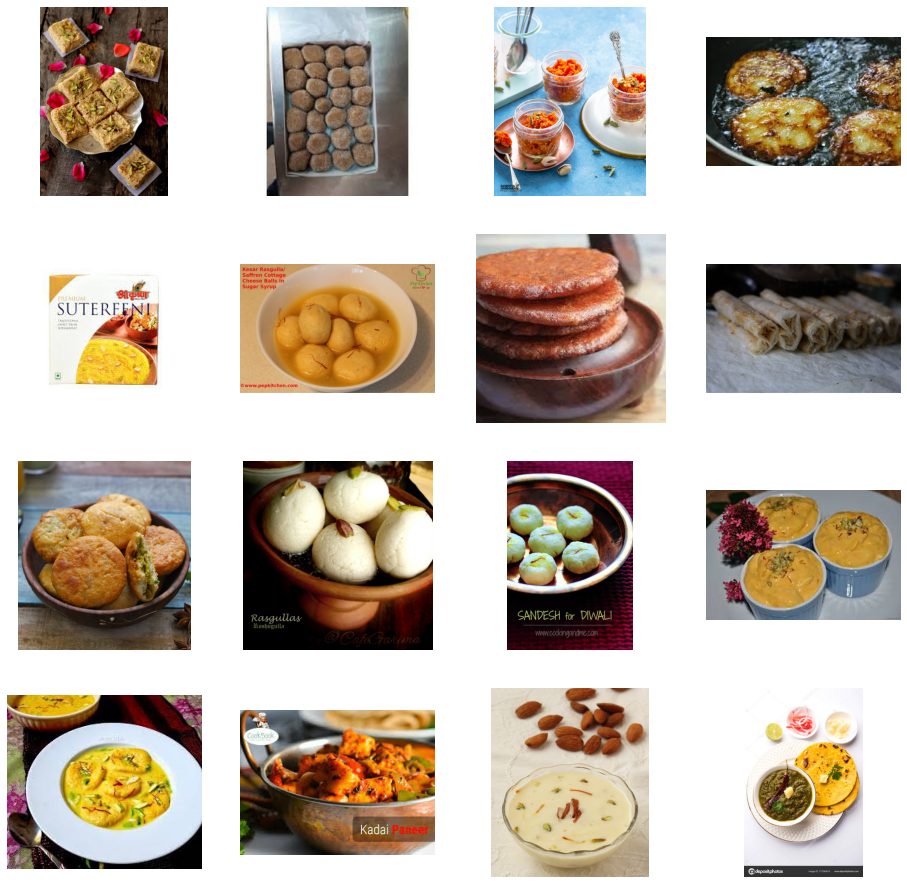

In [35]:
# Plot images after shuffle randomly

fig = plt.gcf()
fig.set_size_inches(16,16)

next_pix_ = images_path
random.shuffle(next_pix_)

for i, img_path in enumerate(next_pix_[0:16]):
    sp = plt.subplot(4,4,i+1)
    sp.axis('off')

    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [36]:
# Shuffle images_pixel with their label

shuf = list(zip(images_pixels, labels))
random.shuffle(shuf)

train_data, labels_data = zip(*shuf)

print('Images: ', len(train_data))
print('Image Labels: ', len(labels_data))

Images:  4000
Image Labels:  4000


In [37]:
# Normalize train Data

x_data = np.array(train_data) / 255
y_data = to_categorical(labels_data, num_classes = 80)

In [38]:
# Splitting

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.3, random_state=100)

print("X train data : ", len(x_train))
print("X label data : ", len(x_val))
print("Y test data : ", len(y_train))
print("Y label data : ", len(y_val))

X train data :  2800
X label data :  1200
Y test data :  2800
Y label data :  1200


In [39]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        shear_range=0.3,
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        fill_mode='nearest')  # randomly flip images

datagen.fit(x_train)

In [40]:
pretrained_model = tf.keras.applications.DenseNet201(input_shape=(150,150,3),
                                                      include_top=False,
                                                      weights='imagenet',
                                                      pooling='avg')

pretrained_model.trainable = False

In [41]:
# Create an Own Model

inputs = pretrained_model.input
drop_layer = tf.keras.layers.Dropout(0.4)(pretrained_model.output)
x_layer = tf.keras.layers.Dense(256, activation='relu')(drop_layer)
x_layer1 = tf.keras.layers.Dense(128, activation='relu')(x_layer)
drop_layer1 = tf.keras.layers.Dropout(0.20)(x_layer1)
outputs = tf.keras.layers.Dense(80, activation='softmax')(drop_layer1)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [43]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_accuracy']
epochs = range(len(acc))

In [49]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]


In [48]:
Name=[]
for file in os.listdir(path):
    Name+=[file]
print(Name)
print(len(Name))

['mysore_pak', 'ghevar', 'sohan_papdi', 'ras_malai', 'ariselu', 'kofta', 'aloo_tikki', 'gajar_ka_halwa', 'chhena_kheeri', 'kakinada_khaja', 'lassi', 'naan', 'chak_hao_kheer', 'butter_chicken', 'kajjikaya', 'chicken_razala', 'lyangcha', 'aloo_gobi', 'dal_makhani', 'bandar_laddu', 'bhindi_masala', 'unni_appam', 'kuzhi_paniyaram', 'sandesh', 'sohan_halwa', 'rasgulla', 'shankarpali', 'pithe', 'imarti', 'misti_doi', 'navrattan_korma', 'daal_puri', 'malapua', 'dal_tadka', 'aloo_matar', 'palak_paneer', 'makki_di_roti_sarson_da_saag', 'poornalu', 'chicken_tikka', 'kadhi_pakoda', 'basundi', 'chapati', 'phirni', 'chikki', 'sheera', 'karela_bharta', 'cham_cham', 'shrikhand', 'litti_chokha', 'qubani_ka_meetha', 'jalebi', 'kachori', 'aloo_methi', 'maach_jhol', 'kadai_paneer', 'doodhpak', 'chana_masala', 'boondi', 'misi_roti', 'bhatura', 'chicken_tikka_masala', 'double_ka_meetha', 'kalakand', 'poha', 'adhirasam', 'ledikeni', 'dharwad_pedha', 'dum_aloo', 'sutar_feni', 'gavvalu', 'anarsa', 'rabri', 'd